<h1> one Variable </h1>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('house.csv')
one_var_data=data

In [5]:
one_var_data

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
X=one_var_data.iloc[:,0]
y=one_var_data.iloc[:,2]

In [7]:
def regression(X,y,n):
    x_mean=np.mean(X)
    y_mean=np.mean(y)
    for i in range(n):
        b1 = ( (X[i]*y[i]) - (n*x_mean*y_mean) ) / ( np.sum(X[i]**2)- (n*(x_mean**2)) )
    b0=y_mean-b1*x_mean    
    return b0,b1

In [20]:
def regression2(X,y,n):
    x_mean=np.mean(X)
    y_mean=np.mean(y)
    # for i in range(n):
    b1 = ( np.dot(X.T,y) - (n*x_mean*y_mean) ) / ( np.sum(X**2)- (n*(x_mean**2)) )
    b0=y_mean-b1*x_mean    
    return b0,b1

In [21]:
n=len(X)
intercpet,coff=regression(X,y,n)
intercpet2,coff2=regression2(X,y,n)
print(intercpet,coff)
print(intercpet2,coff2)


3090.342071922787 176.35440015593022
26780.861618798925 165.09464751958225


In [15]:
x= 1600
yhat = intercpet + coff* x
yhat2 = intercpet2 + coff2* x
print(yhat,yhat2)

285257.38232141116 290932.2976501305


<AxesSubplot:xlabel='size', ylabel='price'>

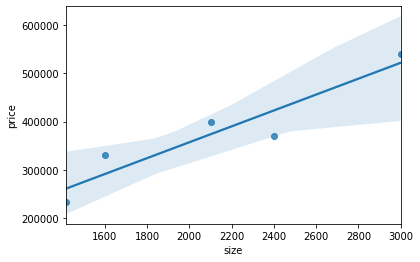

In [17]:
sns.regplot(X,y)

<h1> multi variable </h1>

In [204]:
X= data.iloc[:,0:2]
ones= np.ones([X.shape[0],1])
X= np.concatenate((ones,X),axis=1)
y= data.iloc[:,2:3].values
print(X.shape,y.shape)

(5, 3) (5, 1)


In [211]:
t =  np.dot(X.T,y) 
inv= np.linalg.inv( np.dot(X.T,X))
print(t.shape,inv.shape)
beta = np.dot(inv,t)

(3, 1) (3, 3)


In [212]:
beta

array([[-7.03146512e+04],
       [ 6.39534884e+01],
       [ 1.03298837e+05]])

In [228]:
yhat=np.dot(X[2],beta)
yhat

array([393070.23255814])

In [238]:
X[:,2]

array([3., 3., 3., 2., 4.])

<AxesSubplot:xlabel='size', ylabel='Price'>

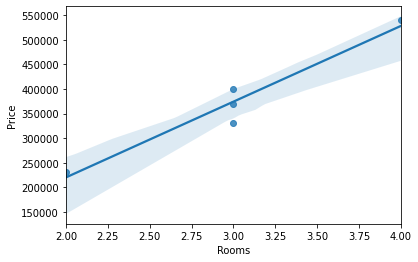

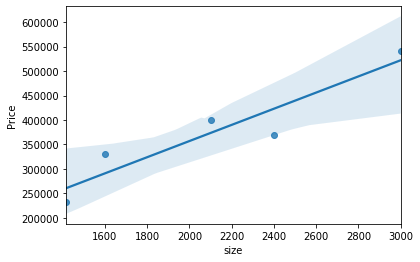

In [244]:
sns.regplot(X[:,2],y)#room
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.figure()
plt.ylabel('Price')
plt.xlabel('size')
sns.regplot(X[:,1],y)#size